# Deep Learning Guided Project: Building A Handwritten Digits Classifier

We'll first visualize digit images from the Hand-Written Digits Dataset from UCI's hand-written digits dataset. For deep learning use cases, images are representated as tabular data (each pixel is a feature column). We'll reshape from tabular data into a 28X28 array, and then use pyplot.imshow() to plot the pixels visually.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_digits

digits = load_digits(as_frame=True)
data = digits['data']
images = digits['images']
target = digits['target']
target_names = digits['target_names']

# Convert the above arrays into DataFrames and Series
data = pd.DataFrame(data)
target = pd.Series(target)

# Shuffle the data
np.random.seed(1)
shuffled_index = np.random.permutation(data.index)
data = data.loc[shuffled_index]
target = target.loc[shuffled_index]

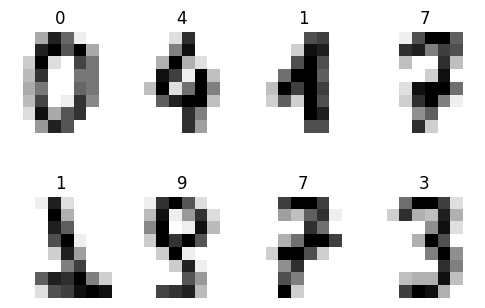

In [58]:
#Plot images and their labels on a 2X4 figure of subplots.
first_row = [0,100,200,300]
sec_row = [1000, 1100, 1200, 1300]
n_plots = 8
i=0
for row in first_row:
    plt.subplot(2,4,i+1)
    plt.imshow(images[row], cmap='gray_r')
    plt.title(target[row])
    plt.axis('off')
    i +=1
    
for row in sec_row:
    plt.subplot(2,4,i+1)
    plt.imshow(images[row], cmap='gray_r')
    plt.title(target[row])
    plt.axis('off')
    i +=1

In [59]:
#Split data and labels into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=1
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1437, 64) (360, 64) (1437,) (360,)


Implement the k-nearest neighbors algorithm to see how well we can predict an image's labeled number based on its pixels.

[0.9877567433803515, 0.9866431576342489, 0.9866456322692403, 0.9849752536500866, 0.9860900767136848, 0.9844221727295225, 0.9827517941103687, 0.9827530314278644, 0.9838653798564712, 0.9816382083642663, 0.9821937639198219, 0.977185102697352, 0.9771838653798565, 0.976073991586241, 0.9738468200940361, 0.9744023756495916, 0.9732900272209849, 0.9716196486018313, 0.9705073001732245]


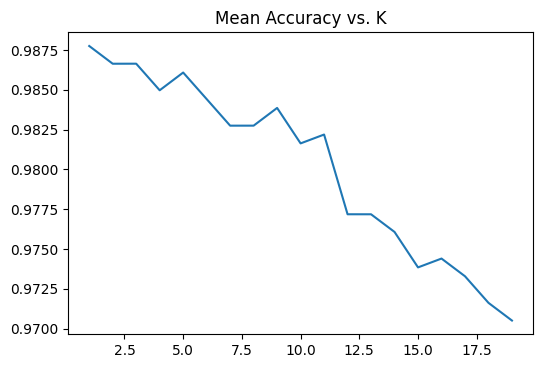

In [60]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

#Define a cross-validation function using accuracy as score
def cross_validate(k, cv_num, X, y):
    kf = KFold(cv_num, shuffle=True, random_state=1)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')
    return np.mean(scores)

#Test out varying levels of K on 4-fold cross validation
k_accuracies = []

for k in range(1,20):
    k_accuracy = cross_validate(k,4,data,target)
    k_accuracies.append(k_accuracy)
    
#Plot Accuracy vs. Varying Levels of K
plt.plot(range(1,20), k_accuracies)
plt.title("Mean Accuracy vs. K")

print(k_accuracies)

We maximize accuracy with k=1 (98.78% accuracy).

K-Nearest Neighbors suffers from high memory usage and no model representation to debug and explore. We'll try using MLPClassifier to build a single hidden layer neural network to compare.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural

[0.9120861172976986, 0.9565973768869092, 0.9682788913635239, 0.9671653056174215, 0.9755122494432071, 0.976070279633754]


Text(0.5, 1.0, 'Mean Accuracy vs. # of Neurons in Single Hidden Layer')

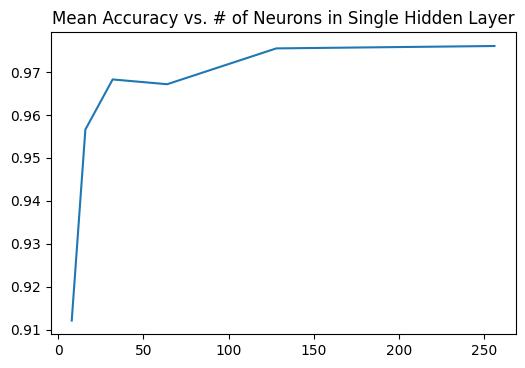

In [61]:
from sklearn.neural_network import MLPClassifier


neurons = [8, 16, 32, 64, 128, 256]
mean_accuracies = []
for value in neurons:
    mlp = MLPClassifier(hidden_layer_sizes=(value,))
    accuracies = cross_val_score(mlp, data, target, cv=4, scoring='accuracy')
    mean_accuracy = np.mean(accuracies)
    mean_accuracies.append(mean_accuracy)

print(mean_accuracies)
plt.plot(neurons, mean_accuracies)
plt.title("Mean Accuracy vs. # of Neurons in Single Hidden Layer")

Increasing the number of neurons in our single hidden layer neural network significantly increases accuracy (97.61% accuracy at 256 neurons).

Let's see what happens when we try a second hidden layer neural network.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural

64 neurons in 2 hidden layer neural network accuracy:  0.976070279633754
[0.9220923038851769, 0.9549245236327641, 0.9677282850779511, 0.9743986636971047, 0.976070279633754, 0.9827480821578817]


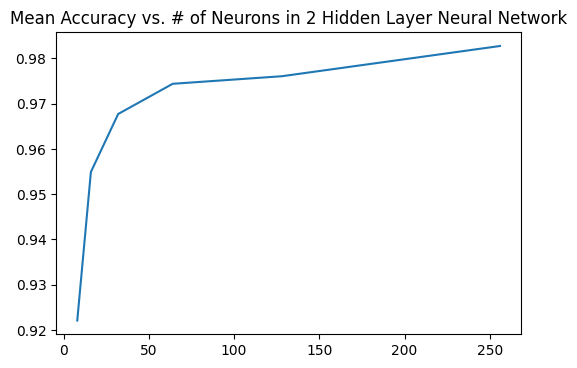

In [62]:
neurons = [8, 16, 32, 64, 128, 256]
mean_accuracies = []
for value in neurons:
    mlp = MLPClassifier(hidden_layer_sizes=(value,value))
    accuracies = cross_val_score(mlp, data, target, cv=4, scoring='accuracy')
    mean_accuracy = np.mean(accuracies)
    mean_accuracies.append(mean_accuracy)

print('64 neurons in 2 hidden layer neural network accuracy: ', mean_accuracies[4])

plt.plot(neurons, mean_accuracies)
plt.title("Mean Accuracy vs. # of Neurons in 2 Hidden Layer Neural Network")
print(mean_accuracies)


Again there is quite a lot of improvement in accuracy as we increase the number of neurons in this second hidden layer neural network. 64 neurons has a 97.61% accuracy, matching the accuracy in our 256 neuron single hidden layer neural network.

There's a risk of using more hidden layers in overfitting. Let's try a 6-fold validation on 3 hidden layers this time.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural

[0.9343719806763285, 0.9693998513563731, 0.9805295429208473]


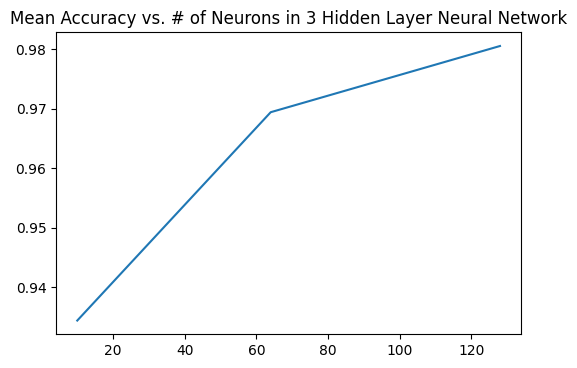

In [63]:
neurons = [10, 64, 128]
mean_accuracies = []
for value in neurons:
    mlp = MLPClassifier(hidden_layer_sizes=(value,value,value))
    accuracies = cross_val_score(mlp, data, target, cv=6, scoring='accuracy')
    mean_accuracy = np.mean(accuracies)
    mean_accuracies.append(mean_accuracy)

plt.plot(neurons, mean_accuracies)
plt.title("Mean Accuracy vs. # of Neurons in 3 Hidden Layer Neural Network")
print(mean_accuracies)

Using a 3 hidden layer neural network achieved an accuracy of 98%, even with 6-fold cross validation.

K-Nearest Neighbors performed the best, though the tests used aren't apples to apples.

K-Nearest Neighbor (4-fold Cross Val): 98.78% accuracy 

Single Hidden Layer Neural Network (4-fold Cross Val): 97.61% 

Double Hidden Layer Neural Network (4-fold Cross Val): 98.27% 

Triple Hidden Layer Neural Network (6-fold Cross Val): 98.05%